In [ ]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.util import trigrams


In [ ]:
!pip install PyPDF2
import PyPDF2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#seleccionar download [d], luego descargar el recurso de nombre "book"


df = pd.read_csv("/content/datos.csv")
type(df)
df

,Id,createdOn,UserId,Failure,attachment
0,005B98A712CF47E78D3D0BAC1FCDCDC9,28/4/2022 04:25,177f6e25-9bcb-4e12-8e31-f8c6064b2e8f,Me estacioné en la calle Taine en polanco y la...,NaN
1,006CF846138941B1987D82F422C40235,31/1/2022 14:24,a8befb76-17ea-4375-a22b-7de4d3436ccc,La aplicación no me permite guardar el vehícul...,NaN
2,01288967B6A14741B3B4F89B5C135CE5,12/5/2022 17:26,1c4ba17a-a913-4ce5-b82c-fd592a645971,buen día en rio Elva no me dejo aplicar pago p...,NaN
3,016C15A0E7DF4186B141B2276575F70E,28/5/2022 18:30,81f41b3a-f6ba-4993-a944-7473541baa5f,Agregue tiempo a mi estacionamiento pero su ap...,NaN
4,0195692916444C79933B6473F0CA5990,2/5/2022 06:14,83561be9-c94f-403a-8935-51425e5115dd,aparece mi coche como inmovilizado y ya pague ...,NaN
...,...,...,...,...,...
536,FF2508161D5D4726BCB59FFD9940356C,28/4/2022 21:29,c108e543-17e7-40d0-9663-912309db5fd1,otra vez de nueva cuenta no me deja realizar e...,NaN
537,FF2B164663A748DE9CFE2082F51AC5E3,30/3/2022 01:49,1a8dab30-9981-4dd8-a1f0-da197fa2a076,no quiere agarrar mi aplicación,NaN
538,FFB7DEC8182548AC94B5B6034E9121DF,29/3/2022 23:35,0cd38b3c-442c-4aae-9d0f-d0ccedc503d1,hola ya realicé la transferencia y no se ve re...,NaN
539,FFD6E3DCCE4E4252913A3E793CF2446C,19/1/2022 19:11,82916f42-9f1f-484c-ac82-69a6247716d0,si esta aplicación era mala ahora es pésima lo...,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          541 non-null    object 
 1   createdOn   541 non-null    object 
 2   UserId      541 non-null    object 
 3   Failure     541 non-null    object 
 4   attachment  0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 21.3+ KB


In [ ]:
fecha_inicio = df['createdOn'].min()
fecha_fin = df['createdOn'].max()
fecha_inicio
print('Los mensajes recibidos datan desde: ',fecha_inicio,' Hasta:',fecha_fin)


Los mensajes recibidos datan desde:  1/2/2022 00:31  Hasta: 9/5/2022 23:53


In [ ]:
dfm=df['Failure']


In [ ]:
dfm

0      Me estacioné en la calle Taine en polanco y la...
1      La aplicación no me permite guardar el vehícul...
2      buen día en rio Elva no me dejo aplicar pago p...
3      Agregue tiempo a mi estacionamiento pero su ap...
4      aparece mi coche como inmovilizado y ya pague ...
                             ...                        
536    otra vez de nueva cuenta no me deja realizar e...
537                     no quiere agarrar mi aplicación 
538    hola ya realicé la transferencia y no se ve re...
539    si esta aplicación era mala ahora es pésima lo...
540                          no puedo pagar con tarjeta 
Name: Failure, Length: 541, dtype: object

# **Normalización de Texto** *italicized text*

In [ ]:

dfn = dfm.str.lower()
dfn = dfn.str.strip()
dfn = dfn.str.replace('[^\w\s]', '')
dfn = dfn.str.replace('\d', '')
dfn = dfn.str.replace('\\n', '')
dfn = dfn.dropna()
dfn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


0      me estacioné en la calle taine en polanco y la...
1      la aplicación no me permite guardar el vehícul...
2      buen día en rio elva no me dejo aplicar pago p...
3      agregue tiempo a mi estacionamiento pero su ap...
4      aparece mi coche como inmovilizado y ya pague ...
                             ...                        
536    otra vez de nueva cuenta no me deja realizar e...
537                      no quiere agarrar mi aplicación
538    hola ya realicé la transferencia y no se ve re...
539    si esta aplicación era mala ahora es pésima lo...
540                           no puedo pagar con tarjeta
Name: Failure, Length: 541, dtype: object

# Tokenización: Es el proceso mediante el cual se sub-divide una cadena de texto en unidades linguísticas minimas (palabras)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokenized = dfn.apply(nltk.word_tokenize)
all_words = tokenized.sum()
text = nltk.Text(all_words)
tokenized

0      [me, estacioné, en, la, calle, taine, en, pola...
1      [la, aplicación, no, me, permite, guardar, el,...
2      [buen, día, en, rio, elva, no, me, dejo, aplic...
3      [agregue, tiempo, a, mi, estacionamiento, pero...
4      [aparece, mi, coche, como, inmovilizado, y, ya...
                             ...                        
536    [otra, vez, de, nueva, cuenta, no, me, deja, r...
537                [no, quiere, agarrar, mi, aplicación]
538    [hola, ya, realicé, la, transferencia, y, no, ...
539    [si, esta, aplicación, era, mala, ahora, es, p...
540                     [no, puedo, pagar, con, tarjeta]
Name: Failure, Length: 541, dtype: object

In [ ]:
all_words

In [ ]:
all_words = tokenized.sum()
all_words

In [ ]:
text = nltk.Text(all_words)
text

<Text: me estacioné en la calle taine en polanco...>

In [ ]:
len(text)

8483

# Análisis

In [ ]:
freq_dist = nltk.FreqDist(all_words)
print(freq_dist)


<FreqDist with 1410 samples and 8483 outcomes>


In [ ]:
freq_dist.most_common(20)

In [ ]:
# Eliminenos las StopWords
nltk.download('stopwords')
from nltk.corpus import stopwords
espaniol_stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
espaniol_stop_words.remove('no')
espaniol_stop_words

In [ ]:
Palabras_Filtradas = [palabra for palabra in all_words if palabra not in espaniol_stop_words]
Palabras_Filtradas
freq_dist_filtered = nltk.FreqDist(Palabras_Filtradas)
freq_dist_filtered.most_common(20)


In [ ]:
freq_dist_filtered = nltk.FreqDist(Palabras_Filtradas)

In [ ]:
freq_dist_filtered.most_common(20)

In [ ]:
freq_dist_filtered.hapaxes()[:20] # palabras unicas

In [ ]:
unique = set(Palabras_Filtradas)
unique_series = pd.Series(list(unique))

unique_series

0         incluso
1         siempre
2         oficial
3           llegó
4        carcasas
          ...    
1289    guardarlo
1290       quiero
1291       ornare
1292       pagado
1293        pongo
Length: 1294, dtype: object

In [ ]:
mas_comunes_20 = list(map(lambda x: list(x), freq_dist_filtered.most_common(20)))
mas_comunes_20

[['no', 473],
 ['puedo', 132],
 ['saldo', 131],
 ['tarjeta', 84],
 ['aplicación', 82],
 ['tiempo', 72],
 ['deja', 70],
 ['pago', 65],
 ['hola', 60],
 ['app', 52],
 ['hacer', 51],
 ['recargar', 51],
 ['pusieron', 47],
 ['pagar', 35],
 ['permite', 34],
 ['recarga', 34],
 ['día', 33],
 ['aparece', 31],
 ['araña', 30],
 ['error', 28]]

In [ ]:
df = pd.DataFrame(mas_comunes_20, columns=['palabra', 'cant'])
df

,palabra,cant
0,no,473
1,puedo,132
2,saldo,131
3,tarjeta,84
4,aplicación,82
5,tiempo,72
6,deja,70
7,pago,65
8,hola,60
9,app,52


In [ ]:
text.similar("puedo")

permite pudo debo poder deja acepta podía intento puefo aceptar cambia


In [ ]:
#txt=text.common_contexts()
text.concordance('puedo')
##text.concordance('saldo')
#txt

Displaying 25 of 132 matches:
recido los intentos de cobro tampoco puedo eliminar la tarjeta y meter otra me 
multa y si tenia pagado el tiempo no puedo hacer pago con ninguna tarjeta el di
 saber que fue lo que sucedió y como puedo reclamar esa infracción llevo semana
sar el pago solo sale cajón verde no puedo efectuar el pago por medio de la apl
ión de una hora o más es un abuso no puedo hacer recargas en la app desde la ma
saldo quiero usar la aplicación y no puedo hola no me da la opción para factura
me dice que no encuntra el cajón que puedo hacer recargué dos veces pesos se ca
rédito y mi saldo no se actualiza no puedo recargar saldo me marca error no pro
nmovilizador ya va min y contando no puedo pagar no acepta las recargas con tar
pués y me hicieron una infraccion no puedo abonar con mi tarjeta de credito y y
e hacer otro cargo por tal motivo no puedo pagar lleva más de horas con esta fa
a de su falla y pésima aplicación no puedo recargar desde la app hola estacione
 la aplica

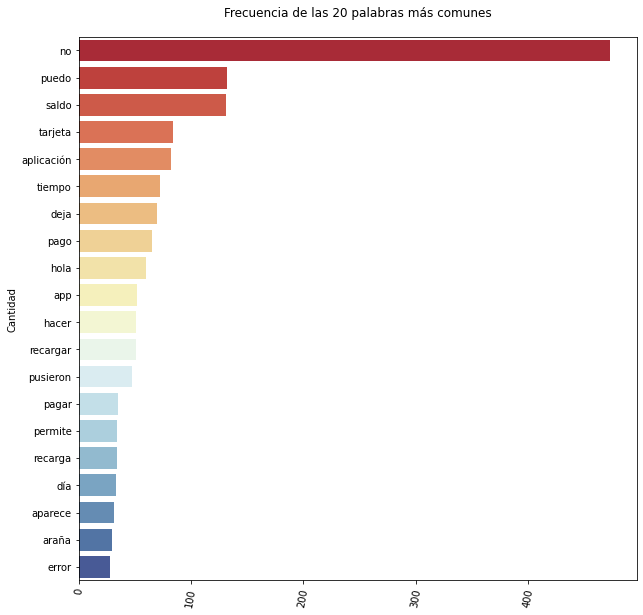

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

sns.barplot(y=df['palabra'], x=df['cant'], ax=ax, palette="RdYlBu")
ax.set_title("Frecuencia de las 20 palabras más comunes", pad=20);
ax.set_xlabel("")
ax.set_ylabel("Cantidad")
ax.tick_params(axis="x", rotation=80);

In [ ]:
text_all_words = nltk.Text(Palabras_Filtradas)
freq_dist_bigrams_filtered = nltk.FreqDist(nltk.bigrams(Palabras_Filtradas))
freq_dist_bigrams_filtered
freq_dist_bigrams_filtered.most_common(20)

NameError: ignored

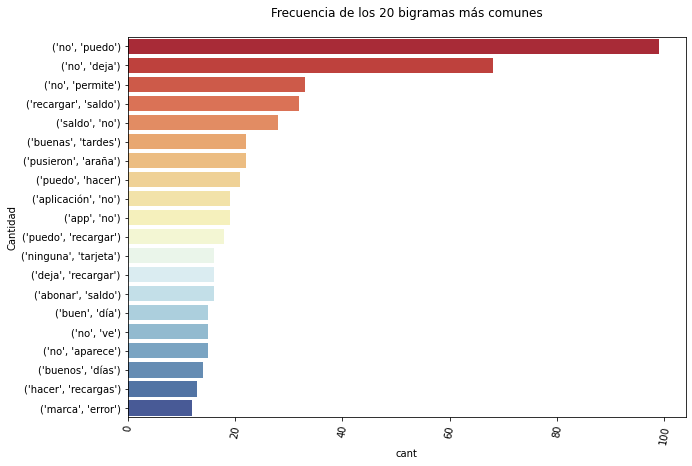

In [ ]:
most_common_20 = list(map(lambda x: list(x), freq_dist_bigrams_filtered.most_common(20)))
dfb = pd.DataFrame(most_common_20, columns=['palabra', 'cant'])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

sns.barplot(y=dfb['palabra'], x=dfb['cant'], ax=ax, palette="RdYlBu")
ax.set_title("Frecuencia de los 20 bigramas más comunes", pad=20);
ax.set_ylabel("Cantidad")
ax.tick_params(axis="x", rotation=80);


In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud(min_font_size=0, max_font_size=1500, background_color="white",colormap="gist_rainbow").generate(' '.join(Palabras_Filtradas))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='none')
plt.axis("off");

NameError: ignored

In [ ]:
freq_dist_trigrams_filtered = nltk.FreqDist(nltk.trigrams(Palabras_Filtradas))
freq_dist_trigrams_filtered.most_common(20)

NameError: ignored

In [ ]:
most_common_trigrams_20 = list(map(lambda x: list(x), freq_dist_trigrams_filtered.most_common(20)))
dft = pd.DataFrame(most_common_trigrams_20, columns=['palabra', 'cant'])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

sns.barplot(y=dft['palabra'], x=dft['cant'], ax=ax, palette="RdYlBu")
ax.set_title("Frecuencia de los 20 trigramas más comunes", pad=20);
ax.set_ylabel("Cantidad")
ax.tick_params(axis="x", rotation=80);

NameError: ignored

In [ ]:

dftot=pd.DataFrame(df[:3].values.tolist()+dfb[:3].values.tolist()+dft[:3].values.tolist())
dftot

,0,1
0,no,473
1,puedo,132
2,saldo,131
3,"(no, puedo)",99
4,"(no, deja)",68
5,"(no, permite)",33
6,"(deja, recargar, saldo)",12
7,"(puedo, recargar, saldo)",10
8,"(hola, buenas, tardes)",7


In [ ]:
freq_dist_bigrams_filtered=list(map(lambda x: list(x), freq_dist_bigrams_filtered.most_common(20)))
dfb = pd.DataFrame(freq_dist_bigrams_filtered, columns=['palabra', 'cant'])

dfb

,palabra,cant
0,"(no, puedo)",99
1,"(no, deja)",68
2,"(no, permite)",33
3,"(recargar, saldo)",32
4,"(saldo, no)",28
5,"(buenas, tardes)",22
6,"(pusieron, araña)",22
7,"(puedo, hacer)",21
8,"(aplicación, no)",19
9,"(app, no)",19


In [ ]:
freq_dist_bigrams_filtered = nltk.FreqDist(nltk.bigrams(Palabras_Filtradas))
freq_dist_bigrams_filtered

In [ ]:
freq_dist_filtered = nltk.FreqDist(Palabras_Filtradas)
freq_dist_filtered

In [ ]:
freq_dist_bigrams_filtered_palabra = nltk.FreqDist(nltk.bigrams(Palabras_Filtradas))
freq_dist_bigrams_filtered=list(map(lambda x: list(x), freq_dist_bigrams_filtered_palabra.most_common()))

freq_dist_bigrams_filtered
freq_dist_bigrams_filtered_palabra

In [ ]:

dfb = pd.DataFrame(freq_dist_bigrams_filtered, columns=['palabra', 'cant'])
dfb

df = pd.DataFrame()
df['bi_gram'] = dfb['palabra']
df['word_1'] = df['bi_gram'].apply(lambda x: x[0])
df['word_2'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: freq_dist_bigrams_filtered_palabra[x])
df['word_0_freq'] = df['word_1'].apply(lambda x: freq_dist_filtered[x])
df['word_1_freq'] = df['word_2'].apply(lambda x: freq_dist_filtered[x])
df

In [ ]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x:np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df.sort_values(by = 'PMI', ascending=False)

,bi_gram,word_1,word_2,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
2455,"(porta, dui)",porta,dui,1,1,1,0.000000,0.0
626,"(lugares, estan)",lugares,estan,1,1,1,0.000000,0.0
1072,"(lejos, buscar)",lejos,buscar,1,1,1,0.000000,0.0
2807,"(segun, asesor)",segun,asesor,1,1,1,0.000000,0.0
2217,"(di, click)",di,click,1,1,1,0.000000,0.0
...,...,...,...,...,...,...,...,...
3345,"(no, pagar)",no,pagar,1,473,35,-14.014979,0.0
813,"(saldo, puedo)",saldo,puedo,1,131,132,-14.077817,0.0
1089,"(pusieron, no)",pusieron,no,1,47,473,-14.440285,0.0
1327,"(no, tiempo)",no,tiempo,1,473,72,-15.055621,0.0


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'].values, color = df['PMI']+df['log(bi_gram_freq)'], 
                 size = (df['PMI']+df['log(bi_gram_freq)']).apply(lambda x: 1/(1+abs(x))).values, 
                 hover_name = df['bi_gram'].values, width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram Frequency)'})
fig.show()